# Linear Regression

In [1]:
# Import needed packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## DATA

[FuelConsumption.csv](https://github.com/ElsonFilho/Python_ML/blob/main/data/FuelConsumption.csv)




**`FuelConsumption.csv`**, contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

- MODEL YEAR
- MAKE
- MODEL
- VEHICLE CLASS
- ENGINE SIZE
- CYLINDERS
- TRANSMISSION
- FUEL TYPE
- FUEL CONSUMPTION in CITY(L/100 km)
- FUEL CONSUMPTION in HWY (L/100 km)
- FUEL CONSUMPTION COMBINED (L/100 km)
- FUEL CONSUMPTION COMBINED MPG (MPG)
- CO2 EMISSIONS (g/km)

Let's create linear regression models using some of these features to predict CO2 emissions of unobserved cars based on the selected features.

In [2]:
url = 'https://raw.githubusercontent.com/ElsonFilho/Python_ML/refs/heads/main/data/FuelConsumption.csv'

try:
    df = pd.read_csv(url)
    # Identify columns that might be 'unnamed'
    unnamed_cols = [col for col in df.columns if 'Unnamed' in col]
    # Remove these columns
    df = df.drop(columns=unnamed_cols, errors='ignore')
    print("Dataset successfully downloaded, loaded, and 'Unnamed' columns (if any) removed.")
    print(df.sample(5))
except Exception as e:
    print(f"An error occurred while downloading or reading the CSV file: {e}")

Dataset successfully downloaded, loaded, and 'Unnamed' columns (if any) removed.
     MODELYEAR       MAKE                    MODEL           VEHICLECLASS  \
88        2014        BMW              335i xDRIVE                COMPACT   
497       2014      HONDA                      FIT  STATION WAGON - SMALL   
410       2014       FORD                   FUSION               MID-SIZE   
216       2014  CHEVROLET  EXPRESS 1500 CARGO CONV            VAN - CARGO   
320       2014      DODGE                  DART GT               MID-SIZE   

     ENGINESIZE  CYLINDERS TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  \
88          3.0          6           A8        Z                  11.7   
497         1.5          4           M5        X                   8.3   
410         1.6          4           M6        X                   9.4   
216         5.3          8           A4        E                  23.9   
320         2.4          4           M6        X                  10.2   

     FUELCO

## Explore and select features

In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Notice that some of the variables are not included, because they aren't numerical. In practice, you would analyze these features if required to improve the accuracy of your model. In the interest of time, let's omit this step here.  
Notice also that MODELYEAR is the same for all cars, so we can drop these variables for this modeling illustration.

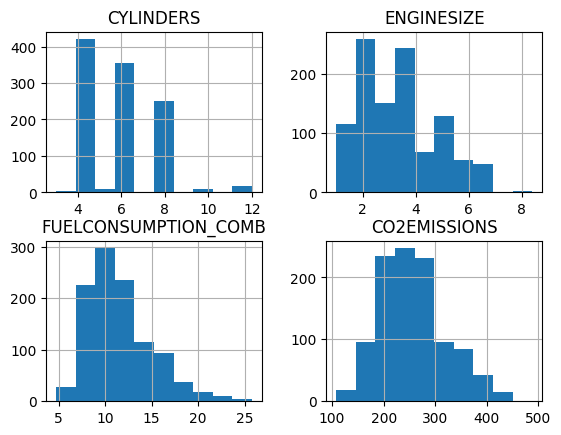

In [4]:
viz = df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

In [5]:
# Drop categoricals and any unseless columns

df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1)

## Simple Linear Regression

We'll use scikit-learn to build our model.

See [Scikit-Learn Linear Regression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to learn all about the linear model predictor object.

We will use engine size to predict CO2 emission.

Let's begin the process by extracting the input feature and target output variables, X and y, from the dataset.

In [6]:
X = df.ENGINESIZE.to_numpy()
y = df.CO2EMISSIONS.to_numpy()

**Train and Test**

Next, we will split the dataset into mutually exclusive training and testing sets. We will train a simple linear regression model on the training set and estimate its ability to generalize to unseen data by using it to make predictions on the unseen testing data.

Since the outcome of each data point is part of the testing data, you have a means of evaluating the out-of-sample accuracy of your model.

Now, we want to randomly split your data into train and test sets, using 80% of the dataset for training and reserving the remaining 20% for testing. Which fraction to use here mostly depends on the size of your data, but typical training sizes range from 20% to 30%. The smaller your data, the larger your training set needs to be because it's easier to find spurious patterns in smaller data. The downside is that your evaluation of generalizability will have less reliability. Bigger is better when it comes to data.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Let's analyze a correlation matrix that displays the pairwise correlations between all features indicates the level of independence between them.

It also indicates how predictive each feature is of the target.

**Build a simple linear regression model**

In [8]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
regressor.fit(X_train.reshape(-1, 1), y_train)

# Print the coefficients
print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

Coefficients:  38.992978724434074
Intercept:  126.28970217408721


We can visualize the goodness-of-fit of the model to the training data by plotting the fitted line over the data.

The regression model is the line given by y = intercept + coefficient * x.

Text(0, 0.5, 'Emission')

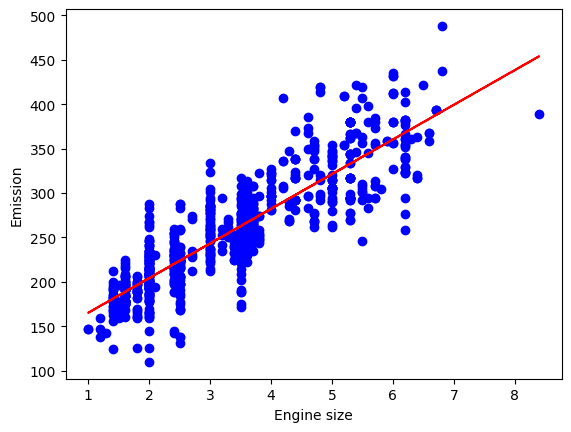

In [9]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

**Model Evaluation**

We can compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics play a key role in the development of a model, as they provide insight into areas that require improvement.

There are different model evaluation metrics, let's use MSE here to calculate the accuracy of our model based on the test set:
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just an average error.

* Mean Squared Error (MSE): MSE is the mean of the squared error. In fact, it's the metric used by the model to find the best fit line, and for that reason, it is also called the residual sum of squares.

* Root Mean Squared Error (RMSE). RMSE simply transforms the MSE into the same units as the variables being compared, which can make it easier to interpret.

* R-squared is not an error but rather a popular metric used to estimate the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = regressor.predict(X_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


## Multiple Linear Regression

Multiple and simple linear regression models can be implemented with exactly the same scikit-learn tools.

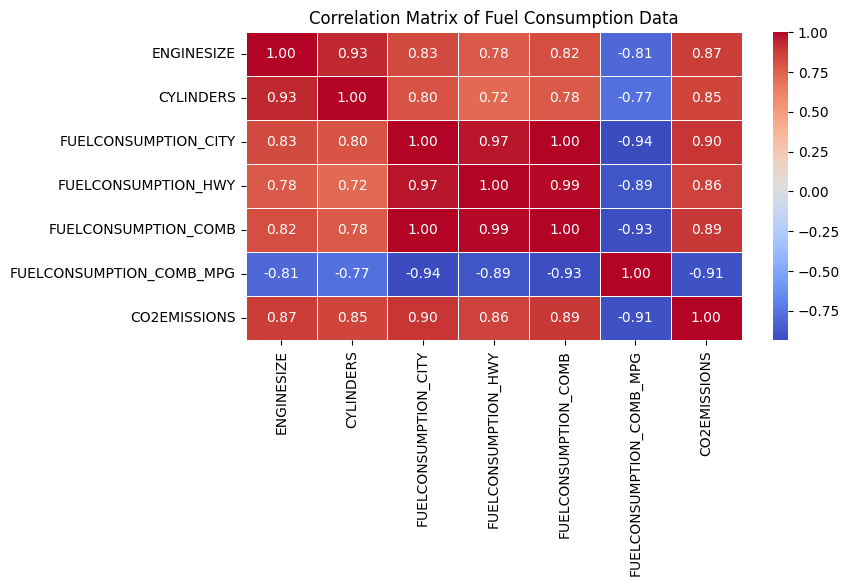

In [11]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 4))  # Adjust the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Fuel Consumption Data')
plt.show()

Look at the bottom row, which shows the correlation between each variable and the target, 'CO2EMISSIONS'. Each of these shows a fairly high level of correlation, each exceeding 85% in magnitude. Thus all of these features are good candidates.

Next, examine the correlations of the distinct pairs. 'ENGINESIZE' and 'CYLINDERS' are highly correlated, but 'ENGINESIZE' is more correlated with the target, so we can drop 'CYLINDERS'.

Similarly, each of the four fuel economy variables is highly correlated with each other. Since FUELCONSUMPTION_COMB_MPG is the most correlated with the target, you can drop the others: 'FUELCONSUMPTION_CITY,' 'FUELCONSUMPTION_HWY,' 'FUELCONSUMPTION_COMB.'

Notice that FUELCONSUMPTION_COMB and FUELCONSUMPTION_COMB_MPG are not perfectly correlated. They should be, though, because they measure the same property in different units. In practice, you would investigate why this is the case. You might find out that some or all of the data is not useable as is.

In [12]:
# Drop these variables

df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis=1)

# verify some randomly selected records

df.sample(5)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
620,3.5,24,276
303,3.6,27,237
602,1.8,35,184
73,6.0,17,380
118,4.4,19,338


To help with selecting predictive features that are not redundant, consider the following scatter matrix, which shows the scatter plots for each pair of input features. The diagonal of the matrix shows each feature's histogram.

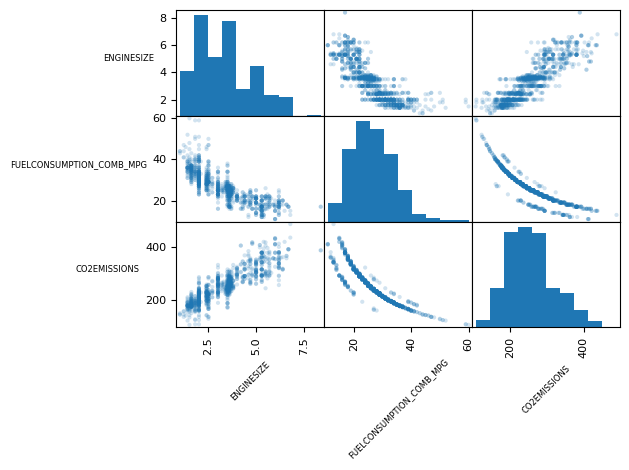

In [13]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2)

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    ax.xaxis.label.set_fontsize(6)
    ax.yaxis.label.set_fontsize(6)

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

The relationship between 'FUELCONSUMPTION_COMB_MPG' and 'CO2EMISSIONS' is non-linear.

In [14]:
# Extract the required columns and convert the resulting dataframes to NumPy arrays.

X = df[['ENGINESIZE', 'FUELCONSUMPTION_COMB_MPG']].to_numpy()
y = df[['CO2EMISSIONS']].to_numpy()

**Preprocess selected features**

We should standardize our input features so the model doesn't inadvertently favor any feature due to its magnitude. The typical way to do this is to subtract the mean and divide by the standard deviation.

Scikit-learn can also do this.

In [15]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


**Create train and test datasets**


Randomly split your data into train and test sets, using 80% of the dataset for training and reserving the remaining 20% for testing.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=42)

**Build a multiple linear regression model**

In [17]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model in the training data
regressor.fit(X_train, y_train)

# Print the coefficients
coef_ =  regressor.coef_
intercept_ = regressor.intercept_

print ('Coefficients: ',coef_)
print ('Intercept: ',intercept_)

Coefficients:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]


The Coefficients and Intercept parameters define the best-fit hyperplane to the data. Since there are only two variables, the hyperplane is a plane. But this best-fit plane will look different in the original, unstandardized feature space.

We can transform our model's parameters back to the original space prior to standardization as follows. This gives a proper sense of what they mean in terms of your original input features. Without these adjustments, the model's outputs would be tied to an abstract, transformed space that doesn’t align with the actual independent variables and the real-world problem we’re solving.

In [18]:
# Get the standard scaler's mean and standard deviation parameters
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

# The least squares parameters can be calculated relative to the original, unstandardized feature space as:
coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print ('Coefficients: ', coef_original)
print ('Intercept: ', intercept_original)

Coefficients:  [[17.8581369  -5.01502179]]
Intercept:  [329.1363967]


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = regressor.predict(X_test)

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 14.29
Mean squared error: 466.11
Root mean squared error: 21.59
R2-score: 0.89


**Visualize model results**


You can visualize the goodness-of-fit of the model to the training data by plotting the fitted plane over the data.

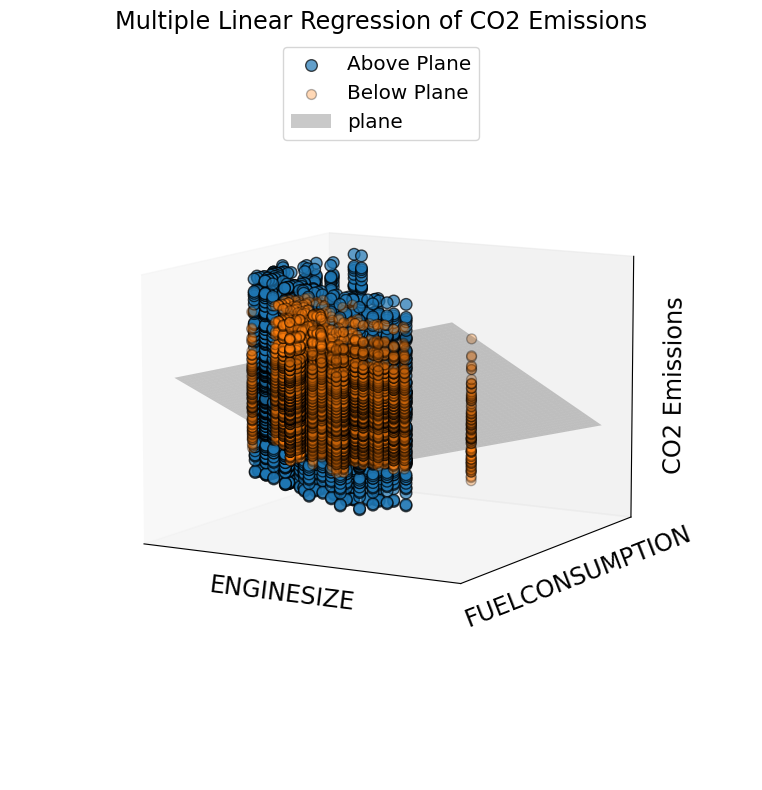

In [20]:
#from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Ensure X1, X2, and y_test have compatible shapes for 3D plotting
X1 = X_test[:, 0] if X_test.ndim > 1 else X_test
X2 = X_test[:, 1] if X_test.ndim > 1 else np.zeros_like(X1)

# Create a mesh grid for plotting the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100),
                               np.linspace(X2.min(), X2.max(), 100))

y_surf = intercept_ +  coef_[0,0] * x1_surf  +  coef_[0,1] * x2_surf

# Predict y values using trained regression model to compare with actual y_test for above/below plane colors
y_pred = regressor.predict(X_test.reshape(-1, 1)) if X_test.ndim == 1 else regressor.predict(X_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:,0]
below_plane = below_plane[:,0]

# Plotting
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points above and below the plane in different colors
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane],  label="Above Plane",s=70,alpha=.7,ec='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane],  label="Below Plane",s=50,alpha=.3,ec='k')

# Plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21,label='plane')

# Set view and labels
ax.view_init(elev=10)

ax.legend(fontsize='x-large',loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()
plt.show()

We can look at vertical slices of the 3D plot by plotting each variable separately as a best-fit line using the corresponding regression parameters.

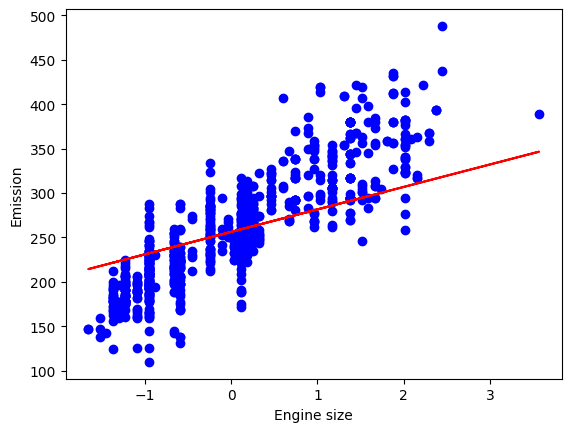

In [21]:
plt.scatter(X_train[:,0], y_train,  color='blue')
plt.plot(X_train[:,0], coef_[0,0] * X_train[:,0] + intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

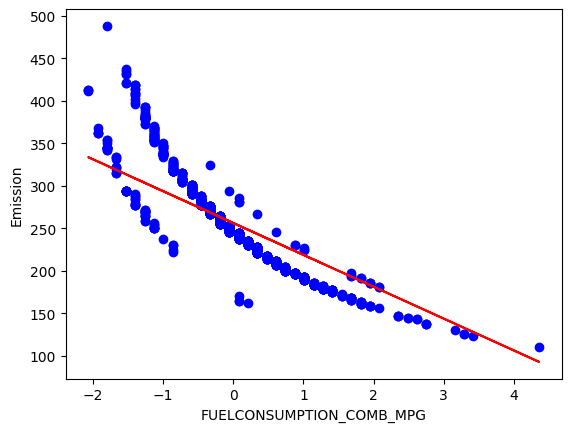

In [22]:
plt.scatter(X_train[:,1], y_train,  color='blue')
plt.plot(X_train[:,1], coef_[0,1] * X_train[:,1] + intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()

# Logistic Regression

**Scenario**

Assume that we are working for a telecommunications company which is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is more likely to leave the company.

## DATA

[ChurnData.csv](https://github.com/ElsonFilho/Python_ML/blob/main/data/ChurnData.csv)

Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information.

The data is relatively easy to understand, and we may uncover insights we can use immediately. Typically it is less expensive to keep customers than acquire new ones.

This data set provides you information about customer preferences, services opted, personal details, etc. which helps you predict customer churn.

In [23]:
# Load Data from URL

url = "https://raw.githubusercontent.com/ElsonFilho/Python_ML/refs/heads/main/data/ChurnData.csv"

churn_df = pd.read_csv(url)

churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


**Data Preprocessing**

Let's select some features for the modeling: 'tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip' and of course 'churn'.

Also, we change the target data type to be an integer, as it is a requirement by the scikit-learn algorithm.

In [24]:
print(type(churn_df))

<class 'pandas.core.frame.DataFrame'>


In [25]:
new_churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'callcard', 'wireless']].copy()
new_churn_df['churn'] = churn_df['churn'].astype('int')

new_churn_df

,tenure,age,address,income,ed,employ,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,1.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,1.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,1.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,1.0,1.0,1


For modeling the input fields X and the target field y need to be fixed.

Since that the target to be predicted is 'churn', the data under this field will be stored under the variable 'y'. We may use any combination or all of the remaining fields as the input. Store these values in the variable 'X'.

In [26]:
X = np.asarray(new_churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'callcard', 'wireless']])
y = np.asarray(new_churn_df['churn'])

It is also a norm to standardize or normalize the dataset in order to have all the features at the same scale. This helps the model learn faster and improves the model performance. We can use of StandardScalar function in the Scikit-Learn library.

In [27]:
from sklearn.preprocessing import StandardScaler

X_norm = StandardScaler().fit(X).transform(X)


print("Original X (first 5 rows):\n", X[:5])
print("\nStandardized X_norm (first 5 rows):\n", X_norm[:5])

Original X (first 5 rows):
 [[ 11.  33.   7. 136.   5.   5.   1.   1.]
 [ 33.  33.  12.  33.   2.   0.   0.   0.]
 [ 23.  30.   9.  30.   1.   2.   0.   0.]
 [ 38.  35.   5.  76.   2.  10.   1.   1.]
 [  7.  35.  14.  80.   2.  15.   1.   0.]]

Standardized X_norm (first 5 rows):
 [[-1.13518441 -0.62595491 -0.4588971   0.4751423   1.6961288  -0.58477841
   0.64686916  1.56469673]
 [-0.11604313 -0.62595491  0.03454064 -0.32886061 -0.6433592  -1.14437497
  -1.54590766 -0.63910148]
 [-0.57928917 -0.85594447 -0.261522   -0.35227817 -1.42318853 -0.92053635
  -1.54590766 -0.63910148]
 [ 0.11557989 -0.47262854 -0.65627219  0.00679109 -0.6433592  -0.02518185
   0.64686916  1.56469673]
 [-1.32048283 -0.47262854  0.23191574  0.03801451 -0.6433592   0.53441472
   0.64686916 -0.63910148]]


**Splitting the dataset**

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

## Logistic Regression Classifier

In [29]:
# Fitting, or Training.

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression().fit(X_train,y_train)

In [30]:
#  Let us predict the churn parameter for the test data set.

yhat = LR.predict(X_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

We can sse the function *predict_proba*, to get the probability of each class.

The first column is the probability of the record belonging to class 0, and second column that of class 1.

Note that the class prediction system uses the threshold for class prediction as 0.5. This means that the class predicted is the one which is most likely.

In [31]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.94497933, 0.05502067],
       [0.7103777 , 0.2896223 ],
       [0.61672203, 0.38327797],
       [0.95148833, 0.04851167],
       [0.65291702, 0.34708298],
       [0.86774053, 0.13225947],
       [0.54735084, 0.45264916],
       [0.6494215 , 0.3505785 ],
       [0.42106951, 0.57893049],
       [0.75651226, 0.24348774]])

Let's examine what role each input feature has to play in the prediction of the 1 class.

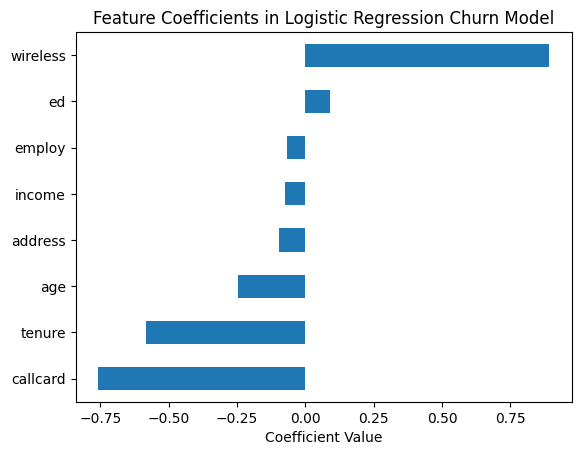

In [32]:
coefficients = pd.Series(LR.coef_[0], index=new_churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

Large positive value of LR Coefficient for a given field indicates that increase in this parameter will lead to better chance of a positive, i.e. 1 class. A large negative value indicates the opposite, which means that an increase in this parameter will lead to poorer chance of a positive class. A lower absolute value indicates weaker affect of the change in that field on the predicted class. Let us examine this with the following exercises.

## Evaluation

In [33]:
from sklearn.metrics import log_loss

log_loss(y_test, yhat_prob)

0.6940522687722751

In [38]:
# --- Debugging lines: Check lengths ---
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred: {len(yhat)}")

Length of y_test: 40
Length of y_pred: 40


1. Classification Report:
-------------------------
              precision    recall  f1-score   support

    No Churn       0.65      0.88      0.75        25
       Churn       0.50      0.20      0.29        15

    accuracy                           0.62        40
   macro avg       0.57      0.54      0.52        40
weighted avg       0.59      0.62      0.57        40


2. Key Performance Metrics on Test Set:
---------------------------------------
Accuracy:  0.6250
Precision: 0.5000
Recall:    0.2000
F1-Score:  0.2857

3. Confusion Matrix:
--------------------


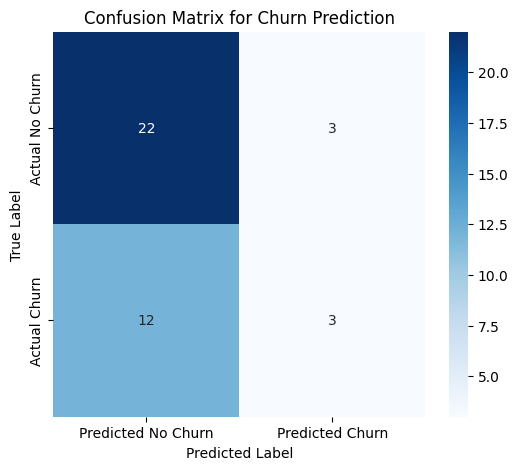

   - True Negatives (TN): Customers who did not churn and were predicted not to churn.
   - False Positives (FP): Customers who did not churn but were predicted to churn (Type I error).
   - False Negatives (FN): Customers who churned but were predicted not to churn (Type II error).
   - True Positives (TP): Customers who churned and were predicted to churn.

4. ROC Curve and AUC:
---------------------


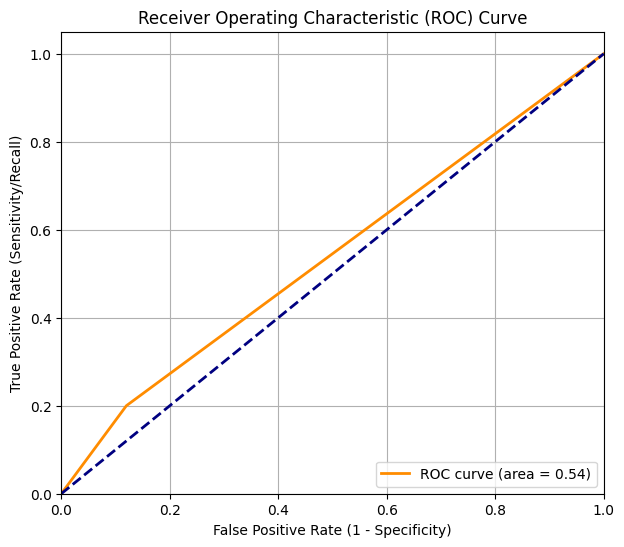

   - AUC (Area Under the Curve): 0.54
   - A higher AUC indicates a better ability of the model to distinguish between churners and non-churners.

5. Feature Coefficients:
------------------------


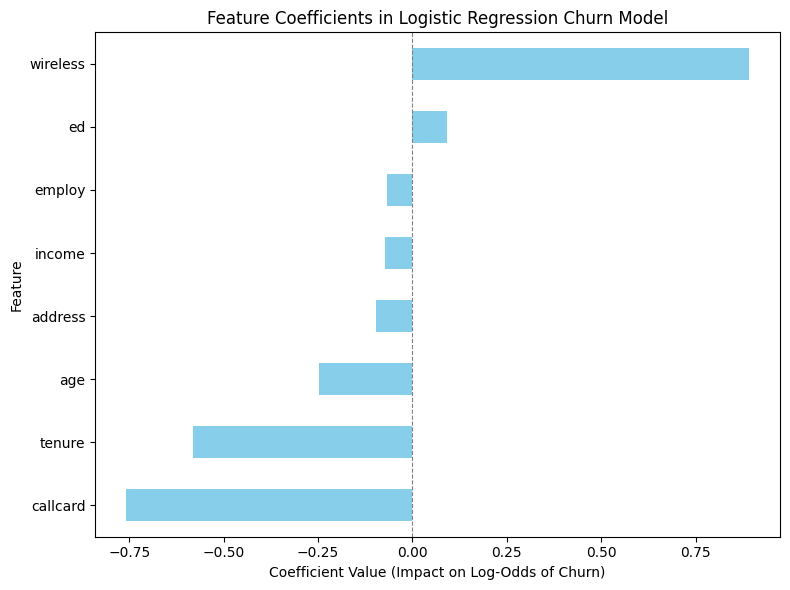


Interpretation of Coefficients:
   - Positive coefficients indicate that an increase in the feature value is associated with an increased likelihood of churn.
   - Negative coefficients indicate that an increase in the feature value is associated with a decreased likelihood of churn (less churn).
   - The magnitude of the coefficient indicates the strength of the relationship.

Raw Coefficients:
 tenure     -0.582008
age        -0.247466
address    -0.095436
income     -0.073764
ed          0.091166
employ     -0.066462
callcard   -0.758143
wireless    0.891188
dtype: float64


In [41]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    confusion_matrix,
    classification_report
)

# 1. Classification Report (Comprehensive Metrics)
print("1. Classification Report:")
print("-------------------------")
print(classification_report(y_test, yhat, target_names=['No Churn', 'Churn']))

# 2. Key Performance Metrics (Individual Display)
print("\n2. Key Performance Metrics on Test Set:")
print("---------------------------------------")
print(f"Accuracy:  {accuracy_score(y_test, yhat):.4f}")
print(f"Precision: {precision_score(y_test, yhat):.4f}")
print(f"Recall:    {recall_score(y_test, yhat):.4f}")
print(f"F1-Score:  {f1_score(y_test, yhat):.4f}")

# 3. Confusion Matrix
print("\n3. Confusion Matrix:")
print("--------------------")
cm = confusion_matrix(y_test, yhat)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix for Churn Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("   - True Negatives (TN): Customers who did not churn and were predicted not to churn.")
print("   - False Positives (FP): Customers who did not churn but were predicted to churn (Type I error).")
print("   - False Negatives (FN): Customers who churned but were predicted not to churn (Type II error).")
print("   - True Positives (TP): Customers who churned and were predicted to churn.")


# 4. ROC Curve and AUC
print("\n4. ROC Curve and AUC:")
print("---------------------")
fpr, tpr, thresholds = roc_curve(y_test, yhat)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"   - AUC (Area Under the Curve): {roc_auc:.2f}")
print("   - A higher AUC indicates a better ability of the model to distinguish between churners and non-churners.")


# 5. Feature Coefficients (from previous step)
print("\n5. Feature Coefficients:")
print("------------------------")
# Ensure 'feature_columns' matches the order and names used for X
coefficients = pd.Series(LR.coef_[0], index=['tenure', 'age', 'address', 'income', 'ed', 'employ', 'callcard', 'wireless'])

plt.figure(figsize=(8, 6))
coefficients.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value (Impact on Log-Odds of Churn)")
plt.ylabel("Feature")
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.8) # Add a line at 0 for clarity
plt.tight_layout()
plt.show()

print("\nInterpretation of Coefficients:")
print("   - Positive coefficients indicate that an increase in the feature value is associated with an increased likelihood of churn.")
print("   - Negative coefficients indicate that an increase in the feature value is associated with a decreased likelihood of churn (less churn).")
print("   - The magnitude of the coefficient indicates the strength of the relationship.")
print("\nRaw Coefficients:\n", coefficients)